In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

pd.options.display.max_rows = 25

with open('pickles/with_weekdays.pickle','rb') as read_file:
    may18_turnstiles = pickle.load(read_file)
    

In [2]:
list(may18_turnstiles)

['C/A',
 'UNIT',
 'SCP',
 'STATION',
 'LINENAME',
 'DIVISION',
 'DATE',
 'TIME',
 'DESC',
 'ENTRIES',
 'EXITS',
 'DATETIME',
 'WEEKDAY_NUM',
 'WEEKDAY']

In [3]:
may18_turnstiles.head()



,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,WEEKDAY_NUM,WEEKDAY
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,00:00:00,REGULAR,6625470,2245312,2018-05-19 00:00:00,5,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,04:00:00,REGULAR,6625494,2245314,2018-05-19 04:00:00,5,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,08:00:00,REGULAR,6625514,2245338,2018-05-19 08:00:00,5,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,12:00:00,REGULAR,6625595,2245415,2018-05-19 12:00:00,5,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,16:00:00,REGULAR,6625791,2245481,2018-05-19 16:00:00,5,Saturday


In [4]:
may18_turnstiles.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'DATETIME', 'WEEKDAY_NUM', 'WEEKDAY'],
      dtype='object')

In [5]:
may18_turnstiles_daily = may18_turnstiles.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"])\
.ENTRIES.first().reset_index()

In [6]:
may18_turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,04/28/2018,6598847
1,A002,R051,02-00-00,59 ST,04/29/2018,6599584
2,A002,R051,02-00-00,59 ST,04/30/2018,6600159
3,A002,R051,02-00-00,59 ST,05/01/2018,6601762
4,A002,R051,02-00-00,59 ST,05/02/2018,6603274


In [7]:
may18_turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (may18_turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .transform(lambda grp: grp.shift(1)))

In [8]:
may18_turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,04/28/2018,6598847,NaN,NaN
1,A002,R051,02-00-00,59 ST,04/29/2018,6599584,04/28/2018,6598847.0
2,A002,R051,02-00-00,59 ST,04/30/2018,6600159,04/29/2018,6599584.0
3,A002,R051,02-00-00,59 ST,05/01/2018,6601762,04/30/2018,6600159.0
4,A002,R051,02-00-00,59 ST,05/02/2018,6603274,05/01/2018,6601762.0


In [9]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

In [18]:
may18_turnstiles_daily["DAILY_ENTRIES"] = may18_turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000) 

3239 29161864.0
245 7117187.0
458763 4365358.0
520 1948601.0
353 4451634.0
249 2411605.0
202 1787548.0
2067430671 910954.0
2067447699 2242433.0
1351066 2067431097.0
5106968 1349325.0
131088 151252580.0
458795 67192668.0
411 1752678.0
638 1323500.0
458773 83931121.0
1324 1517023.0
1554 3329957.0
924928668 1859546175.0
387980040 924934120.0
350 1181759.0
117441735 1487677.0
548 2380958.0
814 4767407.0
117440869 460529.0
2424998 148712.0
545 2430951.0
1224784182 4839361.0
657 12537341.0
1953177667 346.0
502 6304213.0
555 4977394.0
1310834 185542.0


In [20]:
may18_turnstiles_daily.head(10)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,04/29/2018,6599584,04/28/2018,6598847.0,737.0
2,A002,R051,02-00-00,59 ST,04/30/2018,6600159,04/29/2018,6599584.0,575.0
3,A002,R051,02-00-00,59 ST,05/01/2018,6601762,04/30/2018,6600159.0,1603.0
4,A002,R051,02-00-00,59 ST,05/02/2018,6603274,05/01/2018,6601762.0,1512.0
5,A002,R051,02-00-00,59 ST,05/03/2018,6604787,05/02/2018,6603274.0,1513.0
6,A002,R051,02-00-00,59 ST,05/04/2018,6606302,05/03/2018,6604787.0,1515.0
7,A002,R051,02-00-00,59 ST,05/05/2018,6607801,05/04/2018,6606302.0,1499.0
8,A002,R051,02-00-00,59 ST,05/06/2018,6608575,05/05/2018,6607801.0,774.0
9,A002,R051,02-00-00,59 ST,05/07/2018,6609121,05/06/2018,6608575.0,546.0
10,A002,R051,02-00-00,59 ST,05/08/2018,6610581,05/07/2018,6609121.0,1460.0


In [56]:
#may18_turnstiles_daily['STATION'].unique()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
33528,N067,R012,00-00-00,34 ST-PENN STA,04/29/2018,2008970,04/28/2018,2008609.0,361.0
33529,N067,R012,00-00-00,34 ST-PENN STA,04/30/2018,2009177,04/29/2018,2008970.0,207.0
33530,N067,R012,00-00-00,34 ST-PENN STA,05/01/2018,2009923,04/30/2018,2009177.0,746.0
33531,N067,R012,00-00-00,34 ST-PENN STA,05/02/2018,2010723,05/01/2018,2009923.0,800.0
33532,N067,R012,00-00-00,34 ST-PENN STA,05/03/2018,2011466,05/02/2018,2010723.0,743.0


4481073.0

In [77]:
may18_turnstiles_daily = may18_turnstiles_daily.dropna()
#month of May 18 daily entries
may18_entries = may18_turnstiles_daily.groupby('STATION').sum().reset_index()
may18_entries.rename(columns = {'DAILY_ENTRIES':'TTL_ENTRIES_MONTH'}, inplace = True)
may18_entries.sort_values('TTL_ENTRIES_MONTH', ascending = False ).head(10)


,STATION,ENTRIES,PREV_ENTRIES,TTL_ENTRIES_MONTH
59,34 ST-PENN STA,107350374918,1.073462e+11,4481073.0
230,GRD CNTRL-42 ST,41141923989,4.114107e+10,3501329.0
57,34 ST-HERALD SQ,151184268460,1.511821e+11,3280477.0
255,JOURNAL SQUARE,255543748,2.554378e+08,2849193.0
45,23 ST,180833457802,1.808308e+11,2836696.0
14,14 ST-UNION SQ,22477160328,2.235859e+10,2617315.0
350,TIMES SQ-42 ST,157551986492,1.575511e+11,2510090.0
65,42 ST-PORT AUTH,204808623100,2.048066e+11,2505629.0
223,FULTON ST,117058994516,1.170567e+11,2283984.0
107,86 ST,65644510400,6.564955e+10,2076593.0


In [75]:
#sanity check
penn = may18_turnstiles_daily[may18_turnstiles_daily['STATION'] == '34 ST-PENN STA']
penn_may18 = may18_entries[may18_entries['STATION'] == '34 ST-PENN STA']
penn_may18_total = penn_may18['TTL_ENTRIES_MONTH']
penn['DAILY_ENTRIES'].sum() == penn_may18_total

59    True
Name: TTL_ENTRIES_MONTH, dtype: bool

Total Entries per station in May18

[]

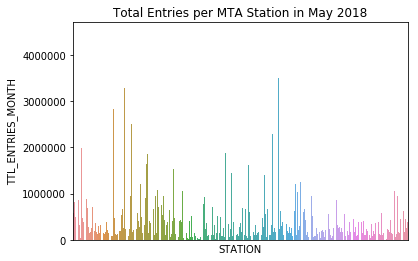

In [86]:
#want barplot with each station and monthly entries, exits, and total traffic
#Entries below
plot = sns.barplot(x = 'STATION', y = 'TTL_ENTRIES_MONTH', data = may18_entries)
plt.title('Total Entries per MTA Station in May 2018')
plot.axes.get_xaxis().set_ticks([])

In [87]:
#Want top 10% of terminals. Want to draw a horizontal line on the above graph at 10%

In [88]:
#Need to find what the cuttoff for top 10% is


In [92]:
top_10pcnt_may18 = may18_entries['TTL_ENTRIES_MONTH'].quantile(.9)

In [93]:
top_10pcnt_may18

925068.8000000005

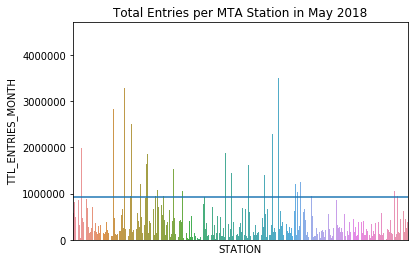

In [146]:
plot = sns.barplot(x = 'STATION', y = 'TTL_ENTRIES_MONTH', data = may18_entries)
plt.title('Total Entries per MTA Station in May 2018')
plot.axes.get_xaxis().set_ticks([])
plt.axhline(y = top_10pcnt_may18)
plt.savefig("total_entries_May18_10perhline.svg")

In [ ]:
#filter out bottom ninety percent

In [97]:
top_10_may18_df = may18_entries[may18_entries['TTL_ENTRIES_MONTH'] > top_10pcnt_may18]

In [98]:
len(top_10_may18_df)

38

In [100]:
top_10_may18_df.tail()

,STATION,ENTRIES,PREV_ENTRIES,TTL_ENTRIES_MONTH
341,ST. GEORGE,3256282892,3.256781e+09,1135775.0
349,THIRTY THIRD ST,311588113,3.117015e+08,1262085.0
350,TIMES SQ-42 ST,157551986492,1.575511e+11,2510090.0
360,W 4 ST-WASH SQ,6850002463,6.848943e+09,1059801.0
363,WALL ST,17641026472,1.764009e+10,940291.0


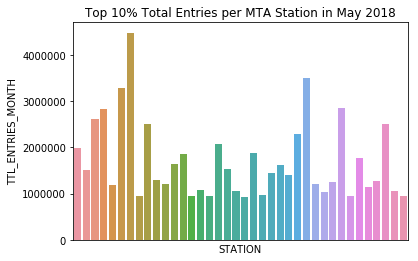

In [147]:
plot = sns.barplot(x = 'STATION', y = 'TTL_ENTRIES_MONTH', data = top_10_may18_df)
plt.title('Top 10% Total Entries per MTA Station in May 2018')
plot.axes.get_xaxis().set_ticks([])
plt.savefig("total_entries_May18_10percent.svg")

In [106]:
top_5pcnt_may18 = may18_entries['TTL_ENTRIES_MONTH'].quantile(.95)

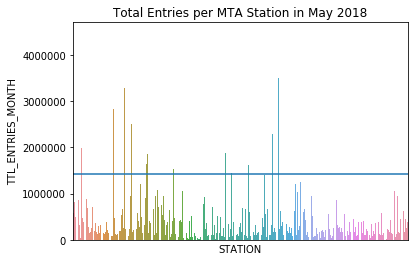

In [148]:
plot = sns.barplot(x = 'STATION', y = 'TTL_ENTRIES_MONTH', data = may18_entries)
plt.title('Total Entries per MTA Station in May 2018')
plot.axes.get_xaxis().set_ticks([])
plt.axhline(y = top_5pcnt_may18)
plt.savefig("total_entries_May18_5perhline.svg")


In [108]:
top_5_may18_df = may18_entries[may18_entries['TTL_ENTRIES_MONTH'] > top_5pcnt_may18]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

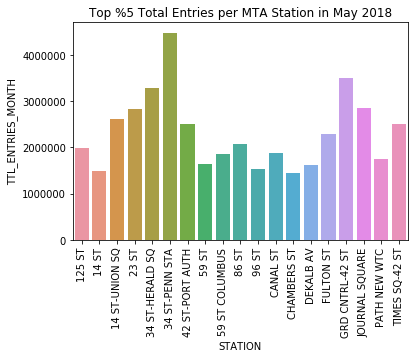

In [111]:
plot = sns.barplot(x = 'STATION', y = 'TTL_ENTRIES_MONTH', data = top_5_may18_df)
plt.title('Top %5 Total Entries per MTA Station in May 2018')
plt.setp(plot.get_xticklabels(), rotation=90)

In [118]:
top_5_may18_df = top_5_may18_df.sort_values('TTL_ENTRIES_MONTH')


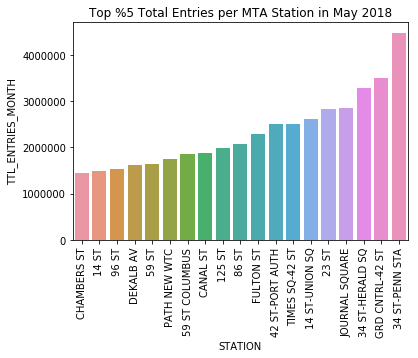

In [149]:
plot = sns.barplot(x = 'STATION', y = 'TTL_ENTRIES_MONTH', data = top_5_may18_df)
plt.title('Top %5 Total Entries per MTA Station in May 2018')
plt.setp(plot.get_xticklabels(), rotation=90)
plt.savefig("total_entries_May18_5percent.svg")


In [109]:
len(top_5_may18_df)

19

In [57]:
#Exits
may18_turnstiles_daily_exits = may18_turnstiles.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"])\
.EXITS.first().reset_index()

In [79]:
may18_turnstiles_daily_exits.head()

,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS,DAILY_EXITS
1,A002,R051,02-00-00,59 ST,04/29/2018,2236102,04/28/2018,2235829.0,273.0
2,A002,R051,02-00-00,59 ST,04/30/2018,2236301,04/29/2018,2236102.0,199.0
3,A002,R051,02-00-00,59 ST,05/01/2018,2236852,04/30/2018,2236301.0,551.0
4,A002,R051,02-00-00,59 ST,05/02/2018,2237420,05/01/2018,2236852.0,568.0
5,A002,R051,02-00-00,59 ST,05/03/2018,2237975,05/02/2018,2237420.0,555.0


In [60]:
may18_turnstiles_daily_exits[["PREV_DATE", "PREV_EXITS"]] = (may18_turnstiles_daily_exits
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "EXITS"]
                                                       .transform(lambda grp: grp.shift(1)))

In [65]:
def get_daily_counts_exits(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        return 0
    return counter

In [66]:
may18_turnstiles_daily_exits["DAILY_EXITS"] = may18_turnstiles_daily_exits.apply(get_daily_counts_exits, axis=1, max_counter=1000000) 

In [83]:
may18_turnstiles_daily_exits = may18_turnstiles_daily_exits.dropna()
#month of May 18 daily exits
may18_exits = may18_turnstiles_daily_exits.groupby('STATION').sum().reset_index()
may18_exits.rename(columns = {'DAILY_EXITS':'TTL_EXITS_MONTH'}, inplace = True)
may18_exits.sort_values('TTL_EXITS_MONTH', ascending = False ).head(10)

,STATION,EXITS,PREV_EXITS,TTL_EXITS_MONTH
59,34 ST-PENN STA,79424797426,7.942232e+10,4190124.0
230,GRD CNTRL-42 ST,58382808240,5.838207e+10,3877164.0
57,34 ST-HERALD SQ,196034417452,1.960322e+11,2989272.0
350,TIMES SQ-42 ST,122877247587,1.228756e+11,2947040.0
255,JOURNAL SQUARE,217766658,2.177572e+08,2694815.0
14,14 ST-UNION SQ,8044988000,8.043095e+09,2613922.0
45,23 ST,200737617514,2.007357e+11,2040807.0
65,42 ST-PORT AUTH,167192064660,1.671903e+11,1892189.0
223,FULTON ST,117828641330,1.178268e+11,1863740.0
107,86 ST,69191000705,6.919774e+10,1738058.0


In [95]:
top_10pcnt_may18_exits = may18_exits['TTL_EXITS_MONTH'].quantile(.9)

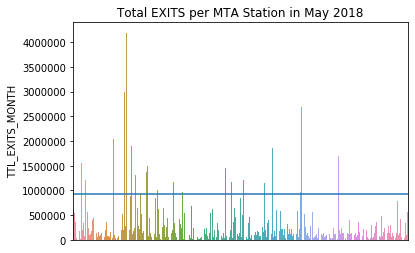

In [150]:
plot = sns.barplot(x = 'STATION', y = 'TTL_EXITS_MONTH', data = may18_exits)
plt.title('Total EXITS per MTA Station in May 2018')
plot.axes.get_xaxis().set_visible(False)
plt.axhline(y = top_10pcnt_may18)
plt.savefig("total_exits_May18_10perhline.svg")

In [122]:
top_10pcnt_may18_exits = may18_exits['TTL_EXITS_MONTH'].quantile(.9)

In [128]:
top_10_may18_exits = may18_exits[may18_exits['TTL_EXITS_MONTH'] > top_10pcnt_may18_exits]

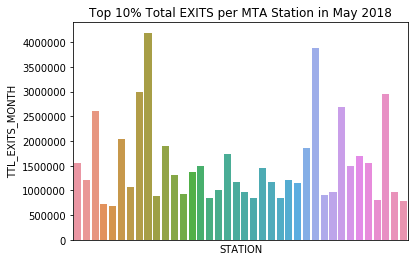

In [151]:
plot = sns.barplot(x = 'STATION', y = 'TTL_EXITS_MONTH', data = top_10_may18_exits)
plt.title('Top 10% Total EXITS per MTA Station in May 2018')
plot.axes.get_xaxis().set_ticks([])
plt.savefig("total_exits_May18_10percent.svg")


In [130]:
top_5pcnt_may18_exits = may18_exits['TTL_EXITS_MONTH'].quantile(.95)

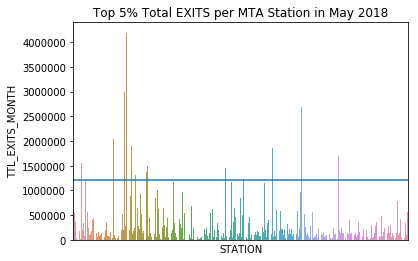

In [153]:
plot = sns.barplot(x = 'STATION', y = 'TTL_EXITS_MONTH', data = may18_exits)
plt.title('Top 5% Total EXITS per MTA Station in May 2018')
plot.axes.get_xaxis().set_ticks([])
plt.axhline(y = top_5pcnt_may18_exits)

plt.savefig("total_exits_May18_5perhline.svg")

In [138]:
top_5_may18_exits = may18_exits[may18_exits['TTL_EXITS_MONTH'] > top_5pcnt_may18_exits].sort_values('TTL_EXITS_MONTH')

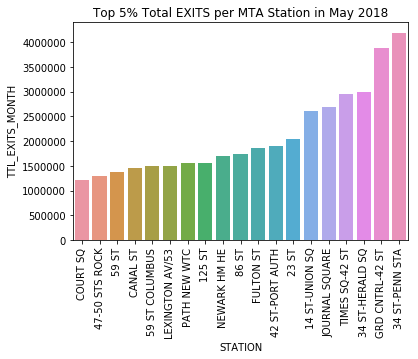

In [154]:
plot = sns.barplot(x = 'STATION', y = 'TTL_EXITS_MONTH', data = top_5_may18_exits)
plt.title('Top 5% Total EXITS per MTA Station in May 2018')
plt.setp(plot.get_xticklabels(), rotation=90)
plt.savefig("total_exits_May18_5percent.svg")

In [10]:
#want lineplot with each station per day of the week for May

In [ ]:
#save svg files to github

In [ ]:
#drop duplicate column
